<a href="https://colab.research.google.com/github/MahaSalehAlgh/Threat-detection-using-machine-learning-algorithms/blob/main/ml_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔒 CIC-IoT-2023 Cybersecurity Project
🎯 Intrusion Detection System for IoT Networks

📥 Please upload your kaggle.json file:


Saving part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv to part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
Saving part-00163-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv to part-00163-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000 (2).csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory

⬇️ Downloading CIC-IoT-2023 Dataset...
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 68

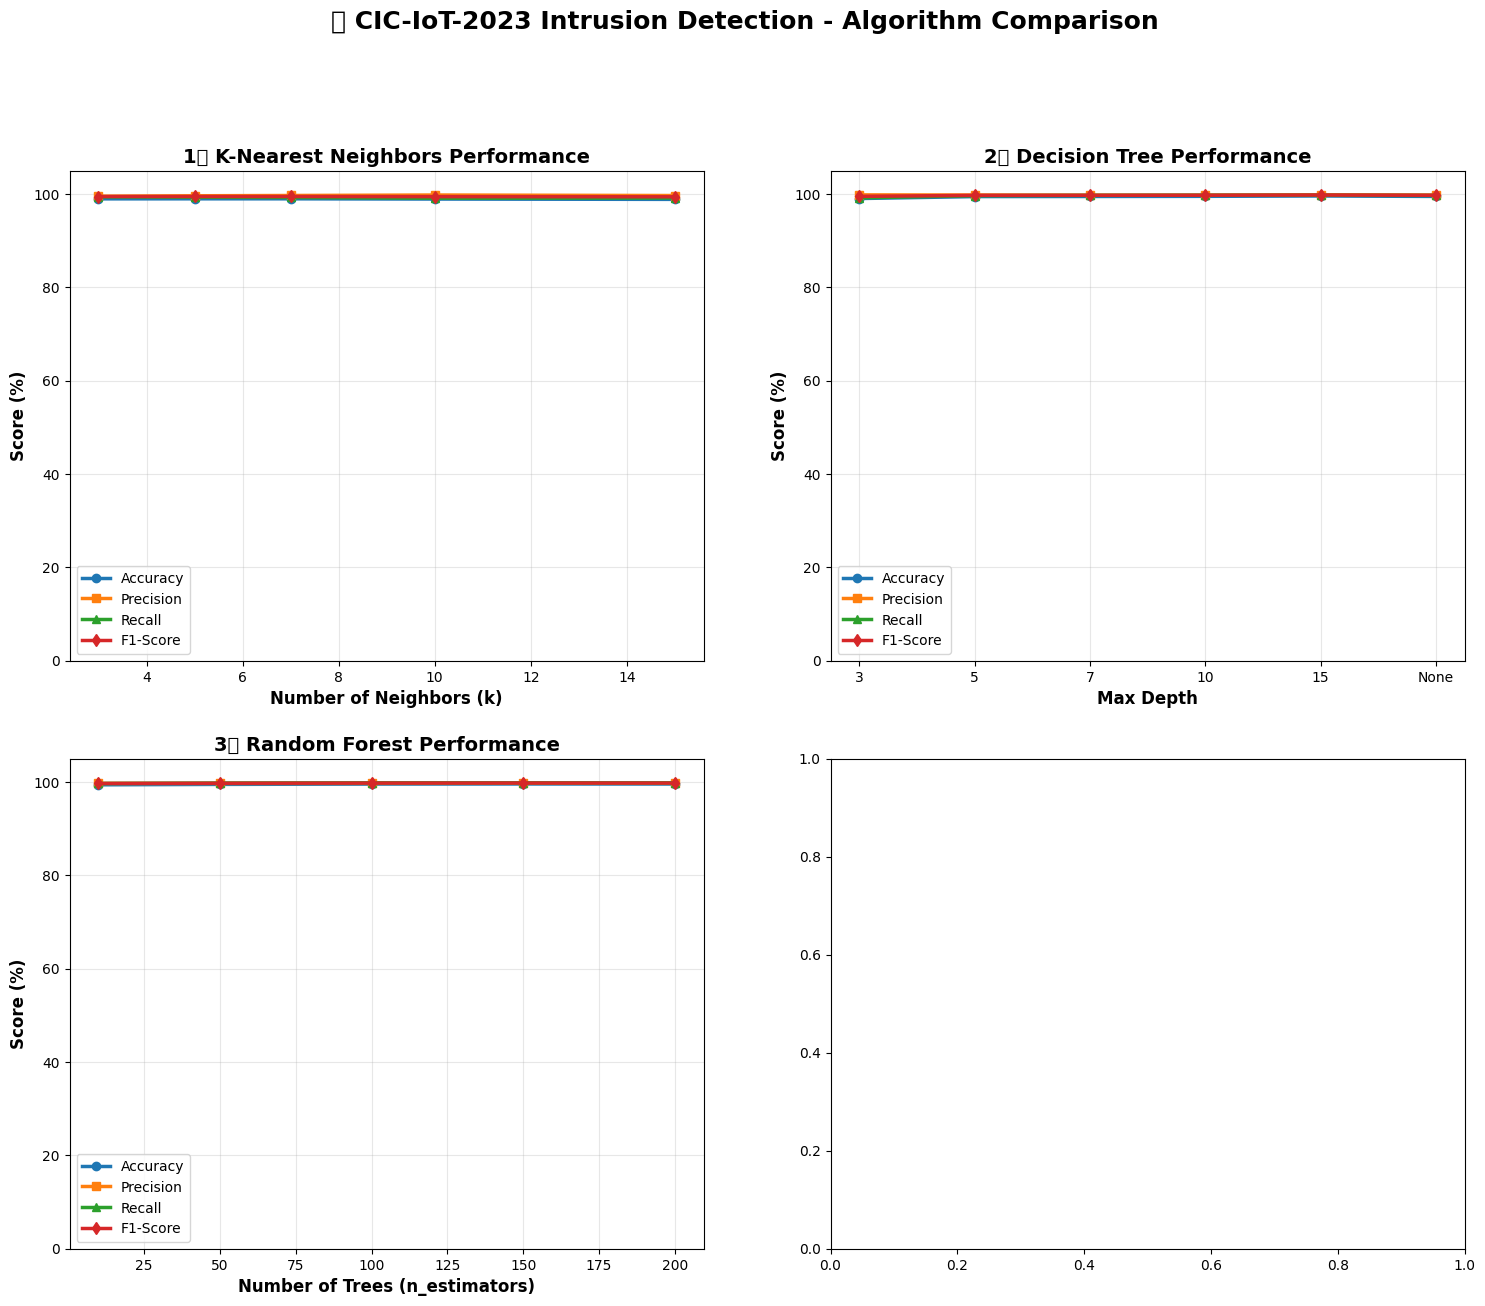

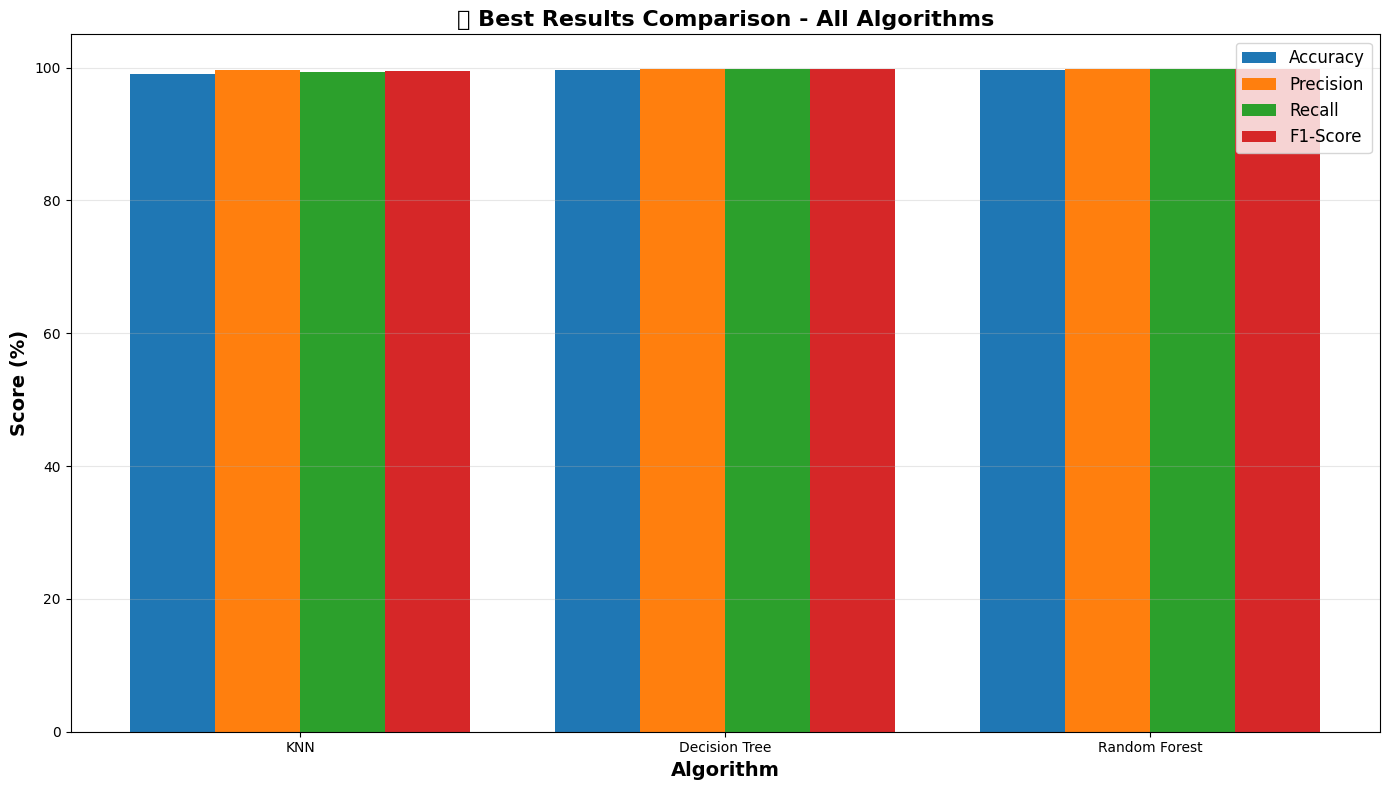


📊 FINAL RESULTS SUMMARY

🔹 Best Results for Each Algorithm:

1️⃣ K-Nearest Neighbors (KNN):
   Best k = 5
   Accuracy = 98.98%
   Precision = 99.63%
   Recall = 99.32%
   F1-Score = 99.48%
2️⃣ Decision Tree:
   Best max_depth = 15
   Accuracy = 99.59%
   Precision = 99.84%
   Recall = 99.74%
   F1-Score = 99.79%
3️⃣ Random Forest:
   Best n_estimators = 150
   Accuracy = 99.59%
   Precision = 99.74%
   Recall = 99.84%
   F1-Score = 99.79%
🏆 BEST OVERALL ALGORITHM: Decision Tree
   Accuracy: 99.59%
   F1-Score: 99.79%

📊 CONFUSION MATRIX - BEST MODEL


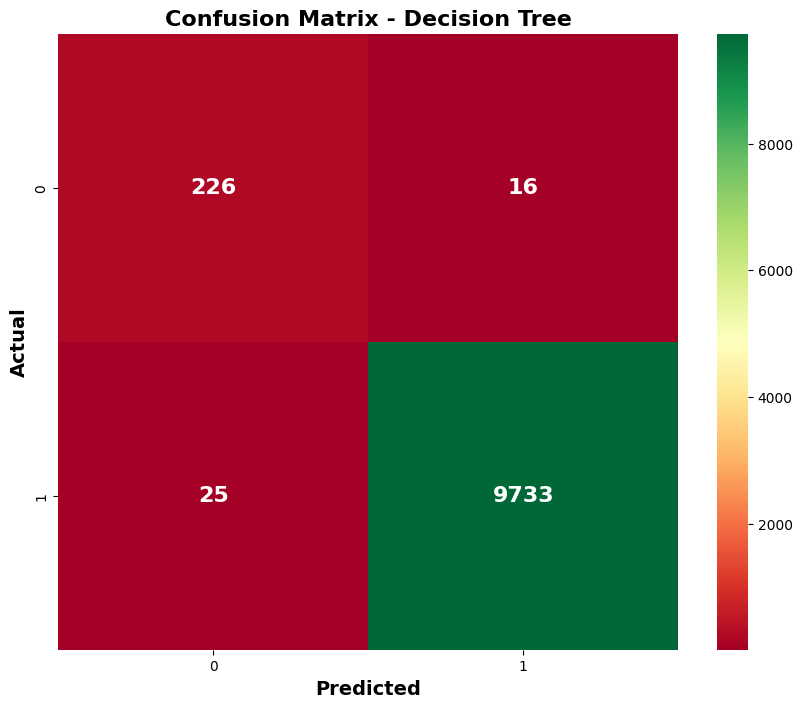


📊 Classification Report:
                precision    recall  f1-score   support

Benign Traffic       0.90      0.93      0.92       242
Attack Traffic       1.00      1.00      1.00      9758

      accuracy                           1.00     10000
     macro avg       0.95      0.97      0.96     10000
  weighted avg       1.00      1.00      1.00     10000


📈 Confusion Matrix Breakdown:
   ✅ True Positives (TP): 9733 (97.3%)
   ✅ True Negatives (TN): 226 (2.3%)
   ❌ False Positives (FP): 16 (0.2%)
   ❌ False Negatives (FN): 25 (0.2%)

   🎯 Total Correct: 9959/10000 (99.59%)
   ⚠️ Total Incorrect: 41/10000 (0.41%)

✅ PROJECT COMPLETED SUCCESSFULLY!


In [ ]:
# ========================================
# CIC-IoT-2023 Dataset - Cybersecurity ML Project
# Intrusion Detection System for IoT Networks
# ========================================

# Step 1: Install and Import Required Libraries
# ========================================
!pip install -q kaggle scikit-learn pandas numpy matplotlib seaborn imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("🔒 CIC-IoT-2023 Cybersecurity Project")
print("🎯 Intrusion Detection System for IoT Networks")
print("="*70)

# ========================================
# Step 2: Download Dataset from Kaggle
# ========================================
# NOTE: You need to upload your kaggle.json file first
# Go to: https://www.kaggle.com/settings/account -> Create New API Token
# Upload the downloaded kaggle.json to Colab

from google.colab import files
import os

print("\n📥 Please upload your kaggle.json file:")
uploaded = files.upload()

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download CIC-IoT-2023 Dataset
print("\n⬇️ Downloading CIC-IoT-2023 Dataset...")
!kaggle datasets download -d akashdogra/cic-iot-2023
!unzip -q cic-iot-2023.zip

print("✅ Dataset downloaded successfully!")

# ========================================
# Step 3: Load and Explore Dataset
# ========================================
print("\n" + "="*70)
print("📊 LOADING AND EXPLORING DATASET")
print("="*70)

# Load CSV files
import glob
csv_files = glob.glob("*.csv")
print(f"\n📁 Found {len(csv_files)} CSV files:")
for f in csv_files:
    print(f"  - {f}")

# Load the first CSV file (or combine multiple if needed)
df = pd.read_csv(csv_files[0])

print(f"\n📈 Dataset Shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}")
print(f"\n🔍 First 5 Rows:")
print(df.head())

# Check for label column
if 'label' in df.columns:
    label_col = 'label'
elif 'Label' in df.columns:
    label_col = 'Label'
else:
    label_col = df.columns[-1]

print(f"\n🎯 Target Column: {label_col}")
print(f"\n📊 Attack Types Distribution:")
print(df[label_col].value_counts())

# ========================================
# Step 4: Data Preprocessing
# ========================================
print("\n" + "="*70)
print("🔧 DATA PREPROCESSING")
print("="*70)

# Remove duplicates
df = df.drop_duplicates()
print(f"\n✅ After removing duplicates: {df.shape}")

# Handle missing values
df = df.dropna()
print(f"✅ After removing missing values: {df.shape}")

# Sample data if too large (for faster processing)
if len(df) > 50000:
    df = df.sample(n=50000, random_state=42)
    print(f"⚡ Sampled 50,000 records for faster processing")

# Binary Classification: Benign vs Attack
df['binary_label'] = df[label_col].apply(lambda x: 0 if 'Benign' in str(x) else 1)

print(f"\n📊 Binary Classification Distribution:")
print(df['binary_label'].value_counts())
print(f"  - Benign (0): {(df['binary_label'] == 0).sum()}")
print(f"  - Attack (1): {(df['binary_label'] == 1).sum()}")

# Separate features and target
X = df.drop([label_col, 'binary_label'], axis=1)
y = df['binary_label']

# Handle categorical features if any
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Training Set: {X_train.shape}")
print(f"✅ Testing Set: {X_test.shape}")

# ========================================
# Step 5: Apply Machine Learning Algorithms
# ========================================
print("\n" + "="*70)
print("🤖 APPLYING MACHINE LEARNING ALGORITHMS")
print("="*70)

results = {}

# -----------------
# 1. K-Nearest Neighbors (KNN)
# -----------------
print("\n1️⃣ K-NEAREST NEIGHBORS (KNN)")
print("-" * 70)

knn_results = []
k_values = [3, 5, 7, 10, 15]

for k in k_values:
    print(f"⏳ Testing k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    knn_results.append({
        'k': k,
        'Accuracy': acc * 100,
        'Precision': prec * 100,
        'Recall': rec * 100,
        'F1-Score': f1 * 100
    })

    print(f"   k={k}: Accuracy={acc*100:.2f}%, Precision={prec*100:.2f}%, "
          f"Recall={rec*100:.2f}%, F1={f1*100:.2f}%")

results['KNN'] = pd.DataFrame(knn_results)

# -----------------
# 2. Decision Tree
# -----------------
print("\n2️⃣ DECISION TREE")
print("-" * 70)

dt_results = []
max_depths = [3, 5, 7, 10, 15, None]

for depth in max_depths:
    print(f"⏳ Testing max_depth={depth}...")
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    dt_results.append({
        'max_depth': str(depth),
        'Accuracy': acc * 100,
        'Precision': prec * 100,
        'Recall': rec * 100,
        'F1-Score': f1 * 100
    })

    print(f"   max_depth={depth}: Accuracy={acc*100:.2f}%, Precision={prec*100:.2f}%, "
          f"Recall={rec*100:.2f}%, F1={f1*100:.2f}%")

results['Decision Tree'] = pd.DataFrame(dt_results)

# -----------------
# 3. Random Forest
# -----------------
print("\n3️⃣ RANDOM FOREST")
print("-" * 70)

rf_results = []
n_estimators_list = [10, 50, 100, 150, 200]

for n_est in n_estimators_list:
    print(f"⏳ Testing n_estimators={n_est}...")
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    rf_results.append({
        'n_estimators': n_est,
        'Accuracy': acc * 100,
        'Precision': prec * 100,
        'Recall': rec * 100,
        'F1-Score': f1 * 100
    })

    print(f"   n_estimators={n_est}: Accuracy={acc*100:.2f}%, Precision={prec*100:.2f}%, "
          f"Recall={rec*100:.2f}%, F1={f1*100:.2f}%")

results['Random Forest'] = pd.DataFrame(rf_results)

# ========================================
# Step 6: Visualizations
# ========================================
print("\n" + "="*70)
print("📊 GENERATING VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('🔒 CIC-IoT-2023 Intrusion Detection - Algorithm Comparison',
             fontsize=18, fontweight='bold', y=0.995)

# 1. KNN Results
ax1 = axes[0, 0]
knn_df = results['KNN']
ax1.plot(knn_df['k'], knn_df['Accuracy'], marker='o', label='Accuracy', linewidth=2.5)
ax1.plot(knn_df['k'], knn_df['Precision'], marker='s', label='Precision', linewidth=2.5)
ax1.plot(knn_df['k'], knn_df['Recall'], marker='^', label='Recall', linewidth=2.5)
ax1.plot(knn_df['k'], knn_df['F1-Score'], marker='d', label='F1-Score', linewidth=2.5)
ax1.set_xlabel('Number of Neighbors (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax1.set_title('1️⃣ K-Nearest Neighbors Performance', fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 105])

# 2. Decision Tree Results
ax2 = axes[0, 1]
dt_df = results['Decision Tree']
x_pos = np.arange(len(dt_df))
ax2.plot(x_pos, dt_df['Accuracy'], marker='o', label='Accuracy', linewidth=2.5)
ax2.plot(x_pos, dt_df['Precision'], marker='s', label='Precision', linewidth=2.5)
ax2.plot(x_pos, dt_df['Recall'], marker='^', label='Recall', linewidth=2.5)
ax2.plot(x_pos, dt_df['F1-Score'], marker='d', label='F1-Score', linewidth=2.5)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(dt_df['max_depth'])
ax2.set_xlabel('Max Depth', fontsize=12, fontweight='bold')
ax2.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax2.set_title('2️⃣ Decision Tree Performance', fontsize=14, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 105])

# 3. Random Forest Results
ax3 = axes[1, 0]
rf_df = results['Random Forest']
ax3.plot(rf_df['n_estimators'], rf_df['Accuracy'], marker='o', label='Accuracy', linewidth=2.5)
ax3.plot(rf_df['n_estimators'], rf_df['Precision'], marker='s', label='Precision', linewidth=2.5)
ax3.plot(rf_df['n_estimators'], rf_df['Recall'], marker='^', label='Recall', linewidth=2.5)
ax3.plot(rf_df['n_estimators'], rf_df['F1-Score'], marker='d', label='F1-Score', linewidth=2.5)
ax3.set_xlabel('Number of Trees (n_estimators)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax3.set_title('3️⃣ Random Forest Performance', fontsize=14, fontweight='bold')
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 105])

# Overall Comparison
fig, ax = plt.subplots(figsize=(14, 8))
best_results = {
    'KNN': results['KNN'].loc[results['KNN']['Accuracy'].idxmax()],
    'Decision Tree': results['Decision Tree'].loc[results['Decision Tree']['Accuracy'].idxmax()],
    'Random Forest': results['Random Forest'].loc[results['Random Forest']['Accuracy'].idxmax()]
}

algorithms = list(best_results.keys())
x = np.arange(len(algorithms))
width = 0.2

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    values = [best_results[alg][metric] for alg in algorithms]
    ax.bar(x + i*width, values, width, label=metric)

ax.set_xlabel('Algorithm', fontsize=14, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=14, fontweight='bold')
ax.set_title('🏆 Best Results Comparison - All Algorithms', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(algorithms)
ax.legend(loc='best', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 105])
plt.tight_layout()
plt.show()

# ========================================
# Step 7: Final Results Summary
# ========================================
print("\n" + "="*70)
print("📊 FINAL RESULTS SUMMARY")
print("="*70)

print("\n🔹 Best Results for Each Algorithm:\n")

print("1️⃣ K-Nearest Neighbors (KNN):")
best_knn = results['KNN'].loc[results['KNN']['Accuracy'].idxmax()]
print(f"   Best k = {int(best_knn['k'])}")
print(f"   Accuracy = {best_knn['Accuracy']:.2f}%")
print(f"   Precision = {best_knn['Precision']:.2f}%")
print(f"   Recall = {best_knn['Recall']:.2f}%")
print(f"   F1-Score = {best_knn['F1-Score']:.2f}%")

print("2️⃣ Decision Tree:")
best_dt = results['Decision Tree'].loc[results['Decision Tree']['Accuracy'].idxmax()]
print(f"   Best max_depth = {best_dt['max_depth']}")
print(f"   Accuracy = {best_dt['Accuracy']:.2f}%")
print(f"   Precision = {best_dt['Precision']:.2f}%")
print(f"   Recall = {best_dt['Recall']:.2f}%")
print(f"   F1-Score = {best_dt['F1-Score']:.2f}%")

print("3️⃣ Random Forest:")
best_rf = results['Random Forest'].loc[results['Random Forest']['Accuracy'].idxmax()]
print(f"   Best n_estimators = {int(best_rf['n_estimators'])}")
print(f"   Accuracy = {best_rf['Accuracy']:.2f}%")
print(f"   Precision = {best_rf['Precision']:.2f}%")
print(f"   Recall = {best_rf['Recall']:.2f}%")
print(f"   F1-Score = {best_rf['F1-Score']:.2f}%")


# Determine best overall
best_overall = max(best_results.items(), key=lambda x: x[1]['Accuracy'])
print("="*70)
print(f"🏆 BEST OVERALL ALGORITHM: {best_overall[0]}")
print(f"   Accuracy: {best_overall[1]['Accuracy']:.2f}%")
print(f"   F1-Score: {best_overall[1]['F1-Score']:.2f}%")
print("="*70)

# ========================================
# Step 8: Confusion Matrix for Best Model
# ========================================
print("\n" + "="*70)
print("📊 CONFUSION MATRIX - BEST MODEL")
print("="*70)

if best_overall[0] == 'KNN':
    best_model = KNeighborsClassifier(n_neighbors=int(best_knn['k']))
elif best_overall[0] == 'Decision Tree':
    depth = None if best_dt['max_depth'] == 'None' else int(float(best_dt['max_depth']))
    best_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
elif best_overall[0] == 'Random Forest':
    best_model = RandomForestClassifier(n_estimators=int(best_rf['n_estimators']), random_state=42)

best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', cbar=True,
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title(f'Confusion Matrix - {best_overall[0]}', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.show()

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_best,
                          target_names=['Benign Traffic', 'Attack Traffic']))

# Calculate confusion matrix metrics
tn, fp, fn, tp = cm.ravel()
print("\n📈 Confusion Matrix Breakdown:")
print(f"   ✅ True Positives (TP): {tp} ({tp/len(y_test)*100:.1f}%)")
print(f"   ✅ True Negatives (TN): {tn} ({tn/len(y_test)*100:.1f}%)")
print(f"   ❌ False Positives (FP): {fp} ({fp/len(y_test)*100:.1f}%)")
print(f"   ❌ False Negatives (FN): {fn} ({fn/len(y_test)*100:.1f}%)")
print(f"\n   🎯 Total Correct: {tp+tn}/{len(y_test)} ({(tp+tn)/len(y_test)*100:.2f}%)")
print(f"   ⚠️ Total Incorrect: {fp+fn}/{len(y_test)} ({(fp+fn)/len(y_test)*100:.2f}%)")

print("\n" + "="*70)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)
